In [1]:
# Step 1: Importing necessary libraries

# These libraries will help us with data analysis, data visualization, and machine learning
import pandas as pd  # To load and manipulate the data
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For creating attractive and informative statistical graphics
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
import warnings
from scipy.stats import chi2_contingency

warnings.filterwarnings('ignore')

# Setting the style of the plots
sns.set(style="whitegrid")

In [2]:
# Step 2: Loading the dataset

# Reading the CSV file that contains the training data set for loan details
data_path = '/Users/sohamshah/Desktop/IML Project/IML Data Set.csv'  # Replace with your file path if different
loan_data = pd.read_csv(data_path)
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [3]:
# Step 3: Exploratory Data Analysis (EDA)

loan_data.head()
print("\nBasic Information about the Dataset:\n")
loan_data.info()
print("\nStatistical Summary of Numerical Columns:\n")
loan_data.describe()
print("\nChecking for Missing Values in Each Column:\n")
print(loan_data.isnull().sum())

numerical_columns = loan_data.select_dtypes(include=['number']).columns
categorical_columns = loan_data.select_dtypes(include=['object']).columns

print("\nNumerical Columns in the Dataset:\n")
print(numerical_columns)
print("\nCategorical Columns in the Dataset:\n")
print(categorical_columns)


Basic Information about the Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94448 entries, 0 to 94447
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        94448 non-null  int64  
 1   Loan_Title                94448 non-null  object 
 2   Application_Type          94448 non-null  object 
 3   Loan_Amount               94448 non-null  int64  
 4   EMI                       94448 non-null  int64  
 5   Term_of_Loan              94448 non-null  int64  
 6   Annual_InterestRate       94448 non-null  float64
 7   Monthly_InterestRate      94448 non-null  float64
 8   Monthly_Household_Income  94448 non-null  int64  
 9   Debt_to_Income            94448 non-null  float64
 10  Grade                     94448 non-null  object 
 11  Home_Ownership            94448 non-null  object 
 12  Delinquency_2years        94448 non-null  int64  
 13  Inquires _6months     

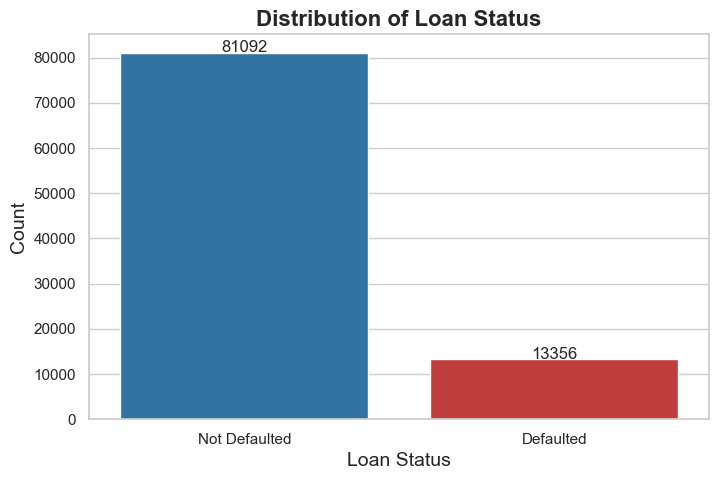

Percentage of defaulters is: 14.1%


In [4]:
# Step 4: Distribution of Target Variable

if 'Loan_Status' in loan_data.columns:
    status_counts = loan_data['Loan_Status'].value_counts().reset_index()
    status_counts.columns = ['Loan_Status', 'Count']
    status_counts['Loan_Status'] = status_counts['Loan_Status'].map({0: 'Not Defaulted', 1: 'Defaulted'})

    # Bar plot to understand the distribution
    plt.figure(figsize=(8, 5))
    sns.barplot(data=status_counts, x='Loan_Status', y='Count', palette=['#1f77b4', '#d62728'])
    plt.title('Distribution of Loan Status', fontsize=16, weight='bold')
    plt.xlabel('Loan Status', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    for i, row in status_counts.iterrows():
        plt.text(i, row['Count'] + 50, str(row['Count']), ha='center', fontsize=12)
    plt.show()

    defaulters_percentage = (status_counts[status_counts['Loan_Status'] == 'Defaulted']['Count'].values[0] / loan_data.shape[0]) * 100
    print(f"Percentage of defaulters is: {defaulters_percentage:.1f}%")
else:
    print("Error: 'Loan_Status' column not found in the dataset.")

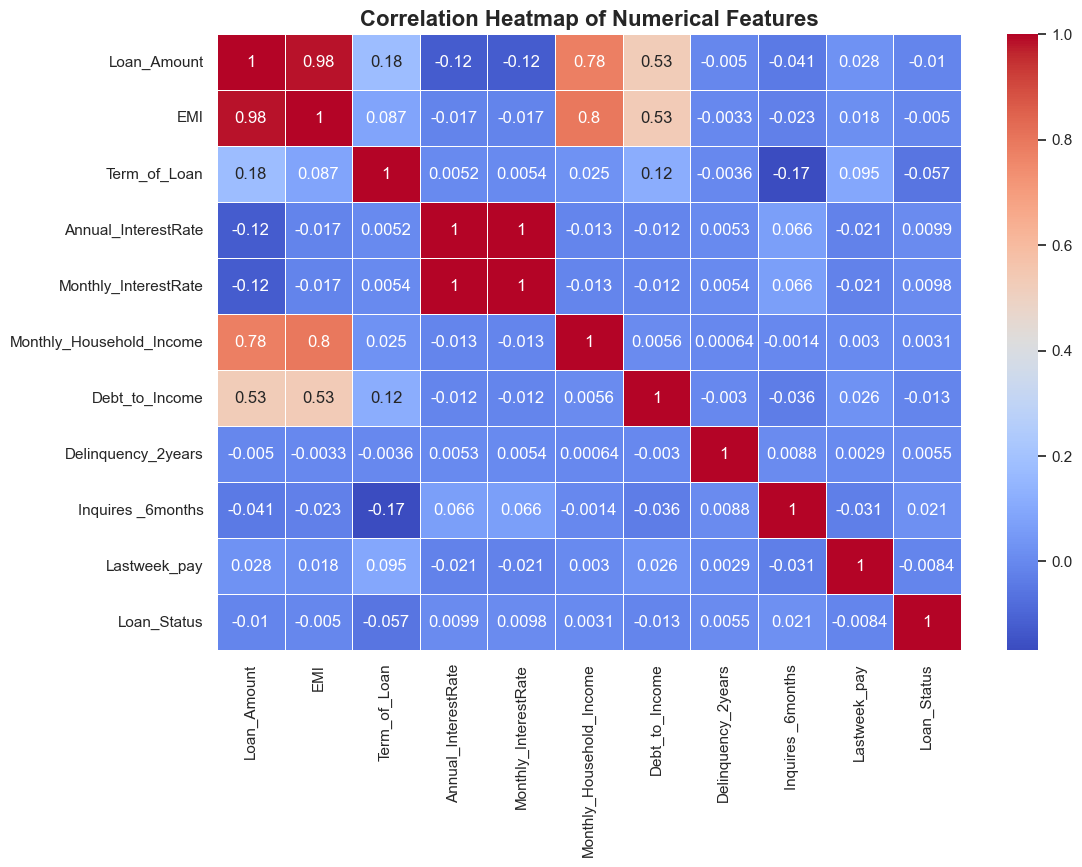

In [5]:
# Step 5: Correlation Heatmap

if 'ID' in numerical_columns:
    numerical_columns = numerical_columns.drop('ID')

numeric_data = loan_data[numerical_columns]
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16, weight='bold')
plt.show()

In [6]:
print(correlation_matrix)

                          Loan_Amount       EMI  Term_of_Loan  \
Loan_Amount                  1.000000  0.983894      0.177328   
EMI                          0.983894  1.000000      0.087148   
Term_of_Loan                 0.177328  0.087148      1.000000   
Annual_InterestRate         -0.124602 -0.016787      0.005198   
Monthly_InterestRate        -0.124531 -0.016734      0.005367   
Monthly_Household_Income     0.777207  0.795652      0.025468   
Debt_to_Income               0.527587  0.531275      0.115739   
Delinquency_2years          -0.004987 -0.003297     -0.003600   
Inquires _6months           -0.041120 -0.023154     -0.167947   
Lastweek_pay                 0.027680  0.017924      0.095442   
Loan_Status                 -0.010166 -0.005010     -0.056583   

                          Annual_InterestRate  Monthly_InterestRate  \
Loan_Amount                         -0.124602             -0.124531   
EMI                                 -0.016787             -0.016734   
Term_o

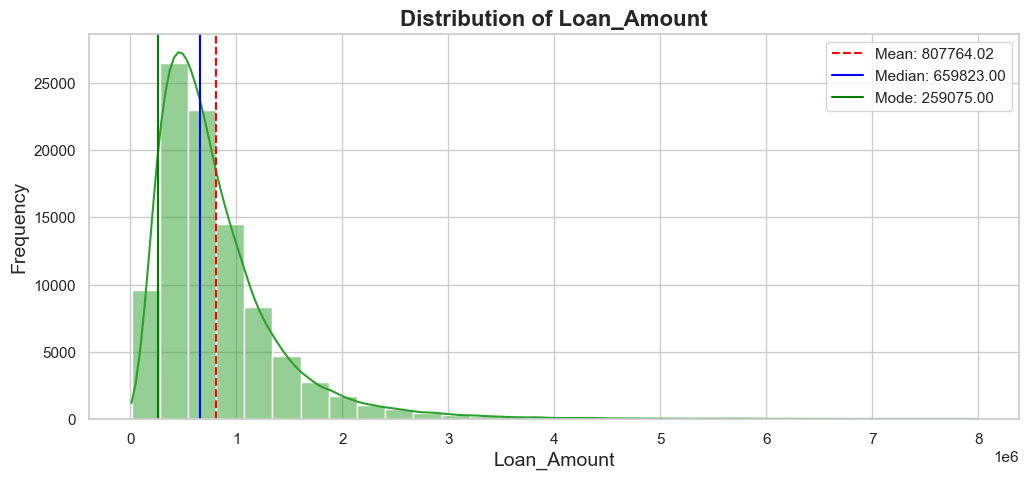

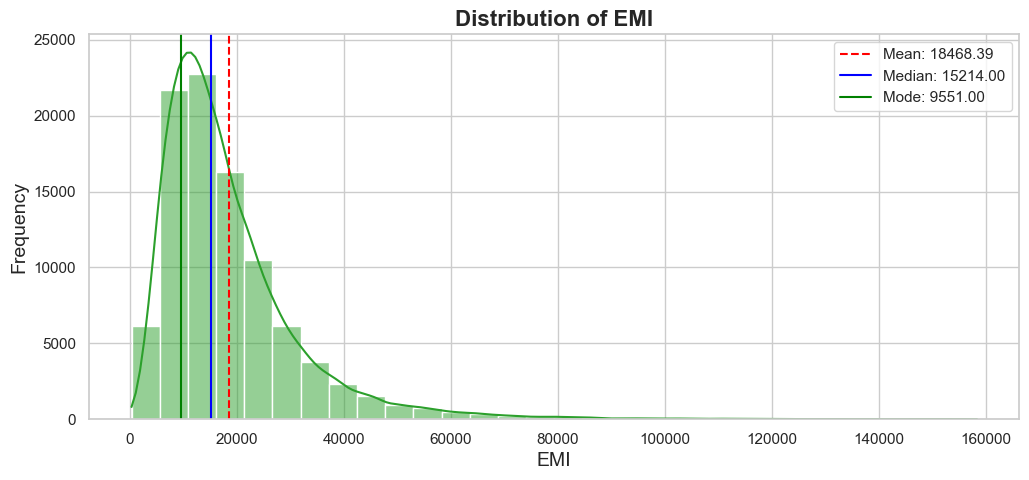

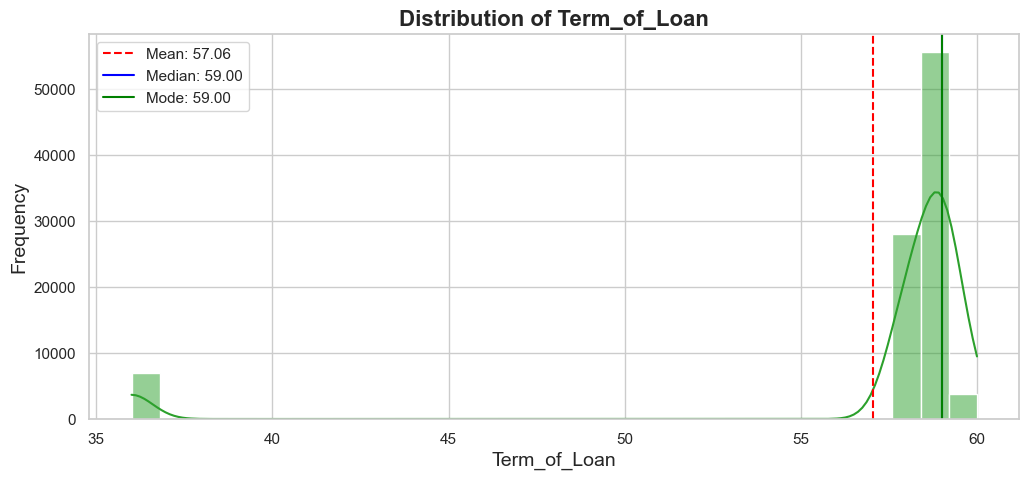

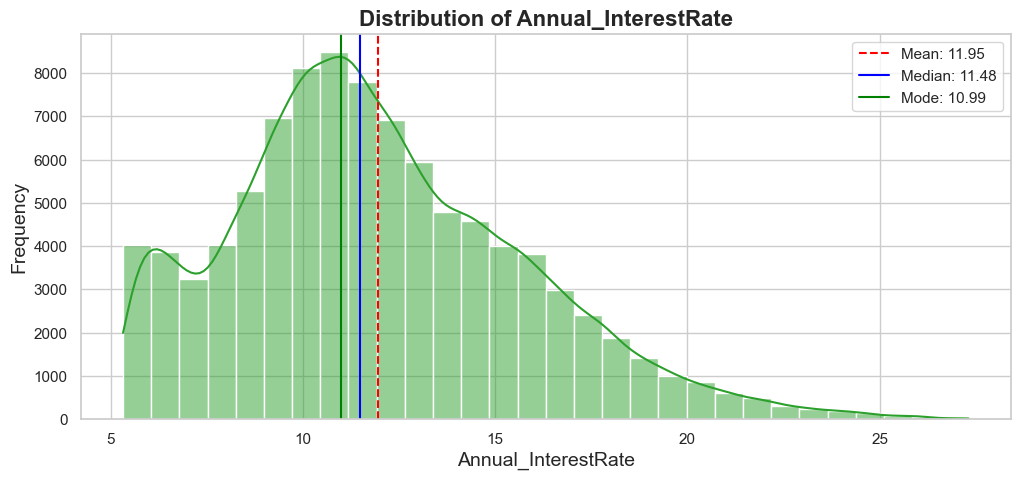

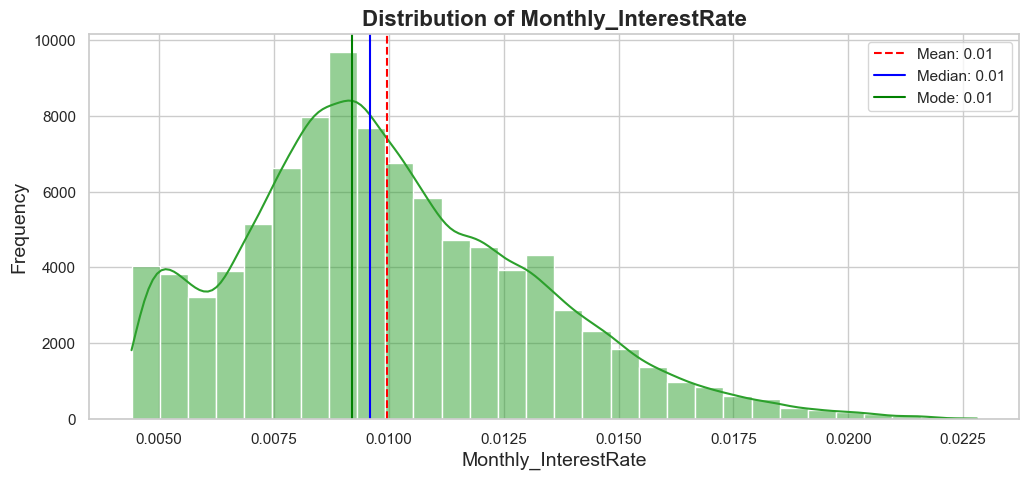

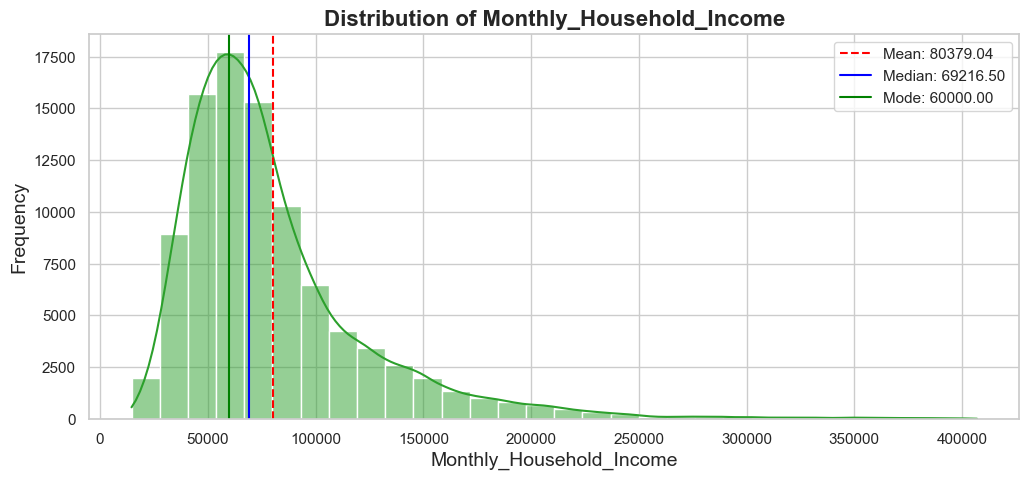

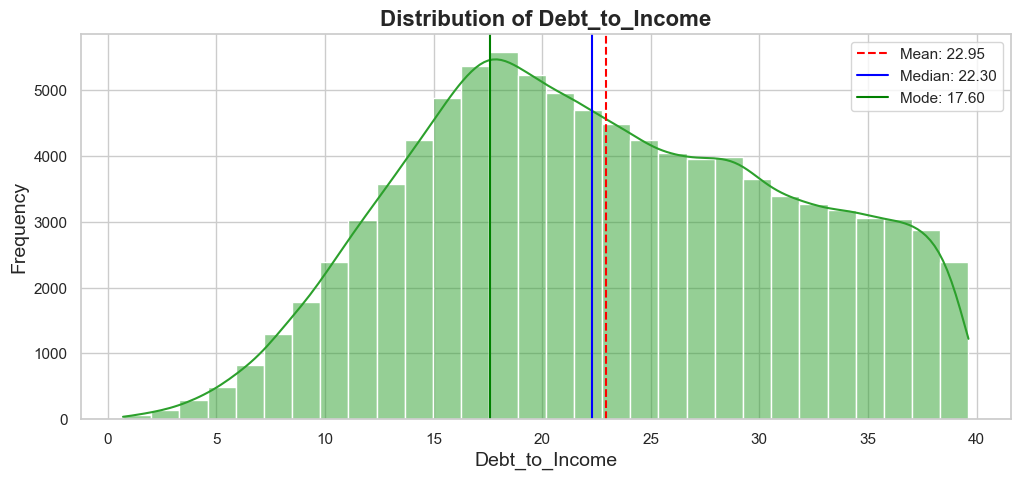

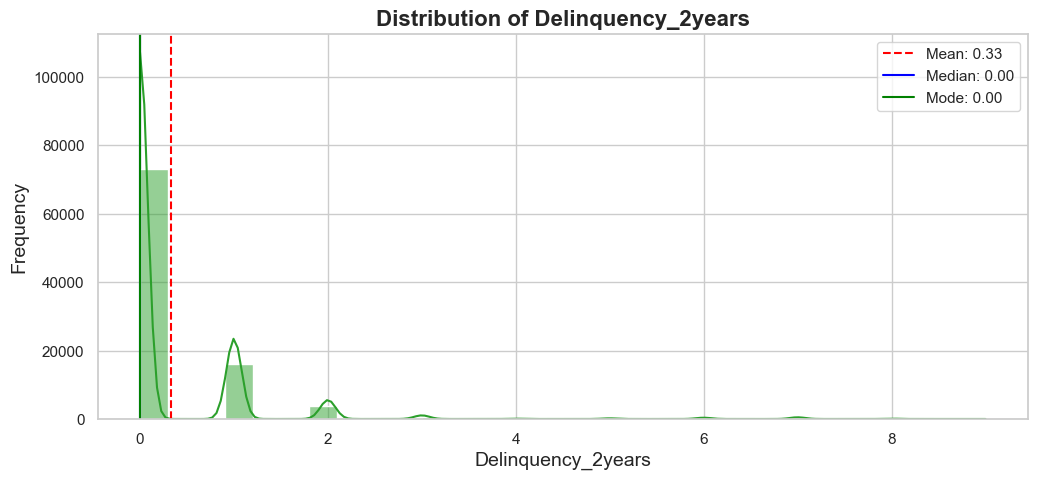

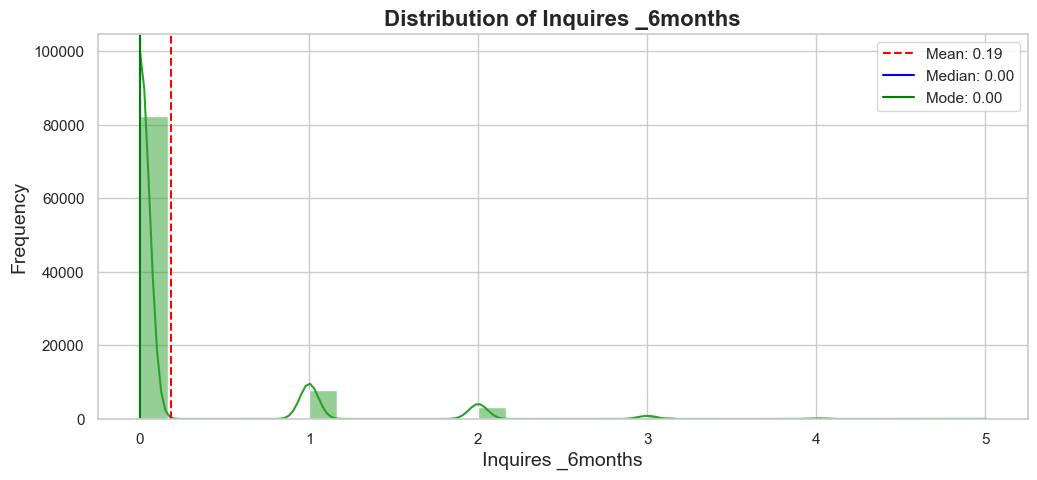

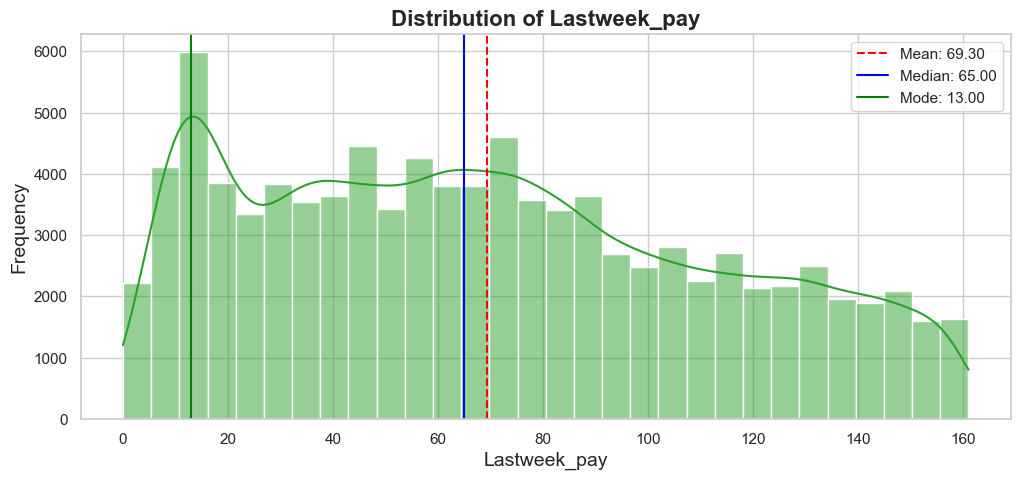

In [7]:
# Step 6: Distributions of Numerical Columns
for column in numerical_columns:
    if column != 'Loan_Status':
        plt.figure(figsize=(12, 5))
        sns.histplot(loan_data[column], kde=True, bins=30, color='#2ca02c')
        plt.title(f'Distribution of {column}', fontsize=16, weight='bold')
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        mean_value = loan_data[column].mean()
        median_value = loan_data[column].median()
        mode_value = loan_data[column].mode()[0]
        plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
        plt.axvline(median_value, color='blue', linestyle='-', label=f'Median: {median_value:.2f}')
        plt.axvline(mode_value, color='green', linestyle='-', label=f'Mode: {mode_value:.2f}')
        plt.legend()
        plt.show()

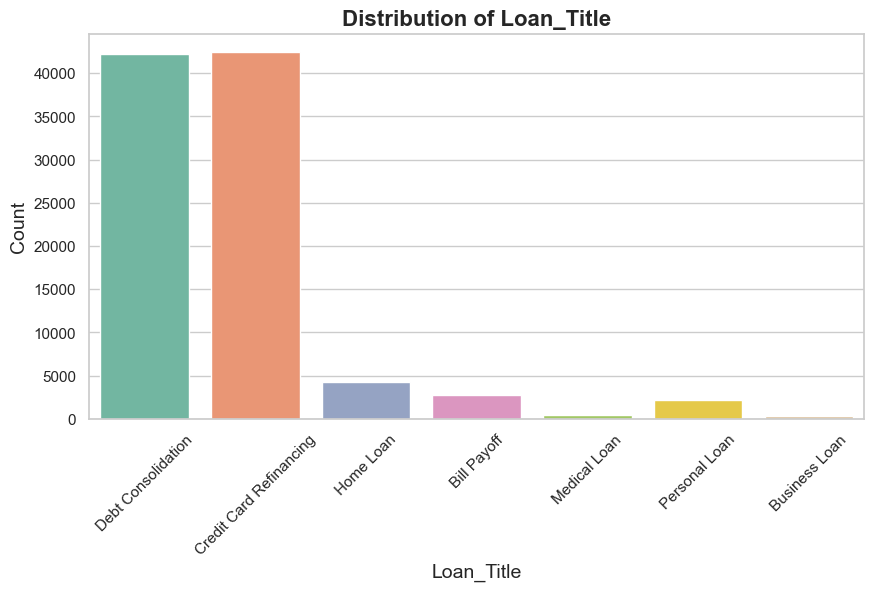

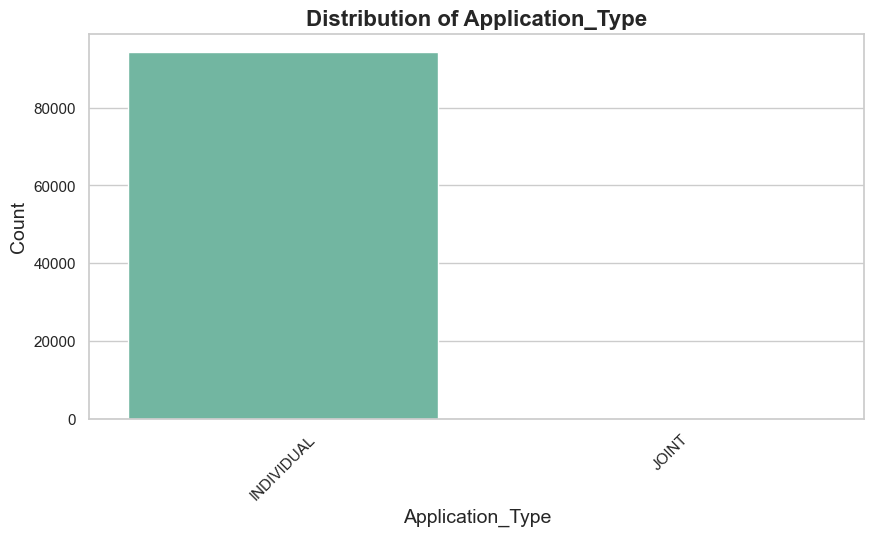

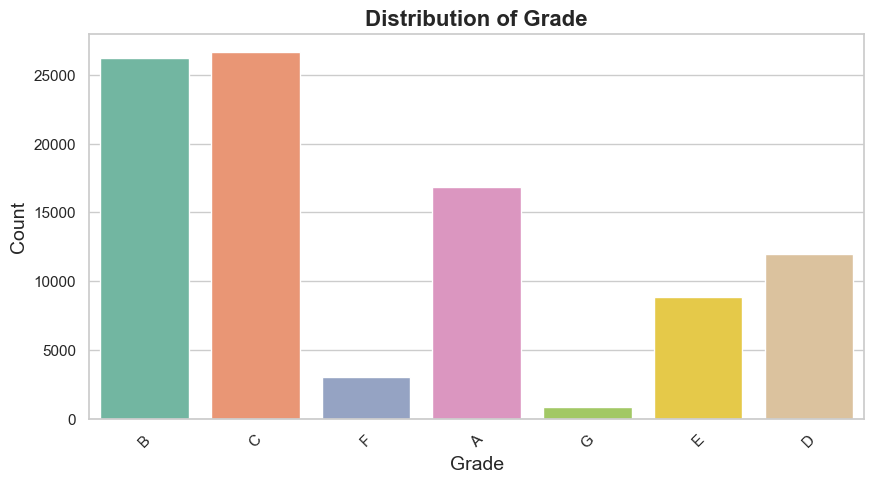

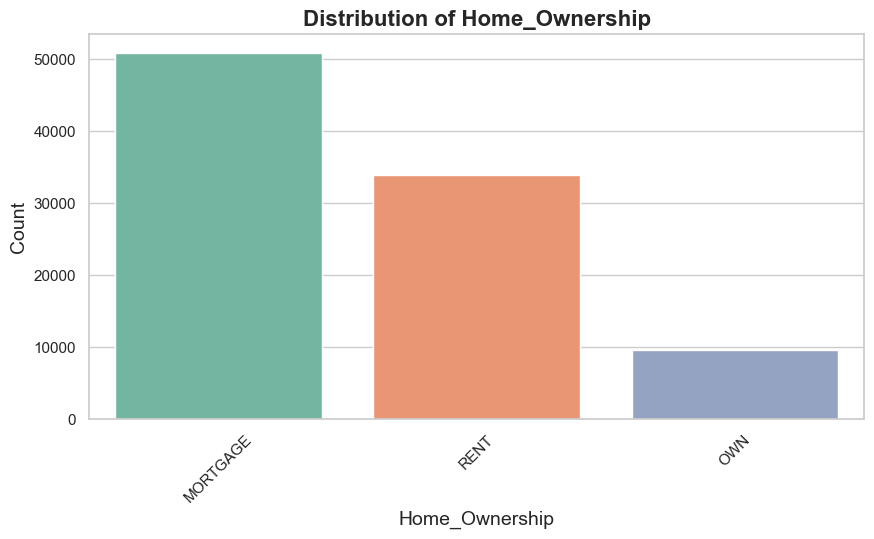

In [8]:
# Step 7: Categorical Columns Analysis
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=loan_data, x=column, palette='Set2')
    plt.title(f'Distribution of {column}', fontsize=16, weight='bold')
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

In [9]:
# Step 8: Correlation analysis of categorical columns with the target variable 'Loan_Status'
print("\nChi-Square Test Results for Categorical Columns and Loan_Status:\n")
chi2_results = []
for column in categorical_columns:
    contingency_table = pd.crosstab(loan_data[column], loan_data['Loan_Status'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append((column, chi2, p))
    print(f"{column} - Chi2: {chi2:.2f}, p-value: {p:.7f}")
    if p < 0.05:
        print(f"There is a significant relationship between {column} and Loan_Status (p < 0.05).\n")
    else:
        print(f"No significant relationship between {column} and Loan_Status (p >= 0.05).\n")


Chi-Square Test Results for Categorical Columns and Loan_Status:

Loan_Title - Chi2: 163.07, p-value: 0.0000000
There is a significant relationship between Loan_Title and Loan_Status (p < 0.05).

Application_Type - Chi2: 0.71, p-value: 0.4008694
No significant relationship between Application_Type and Loan_Status (p >= 0.05).

Grade - Chi2: 11.11, p-value: 0.0850565
No significant relationship between Grade and Loan_Status (p >= 0.05).

Home_Ownership - Chi2: 4.50, p-value: 0.1052789
No significant relationship between Home_Ownership and Loan_Status (p >= 0.05).



In [10]:
# Step 9: Feature Selection Process

# Selecting the top 5 most correlated numerical features
numerical_features_corr = correlation_matrix['Loan_Status'].abs().sort_values(ascending=False)
numerical_features_selected = numerical_features_corr.index[1:6].tolist()  # Skip the target variable itself

# Selecting the top 2 most correlated categorical features based on Chi-Square test
chi2_results = sorted(chi2_results, key=lambda x: x[1], reverse=True)  # Sort by Chi-Square value
categorical_features_selected = [result[0] for result in chi2_results[:2]]

selected_features = numerical_features_selected + categorical_features_selected

print("\nSelected Features for Modeling:\n")
print(selected_features)

loan_data_selected = loan_data[selected_features + ['Loan_Status']]


Selected Features for Modeling:

['Term_of_Loan', 'Inquires _6months', 'Debt_to_Income', 'Loan_Amount', 'Annual_InterestRate', 'Loan_Title', 'Grade']


In [11]:
# Step 10: Building initial Logistic Regression Model

X = loan_data_selected.drop(columns=['Loan_Status'])
y = loan_data_selected['Loan_Status']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print("\nLogistic Regression Parameters:\n")
print(logreg.get_params())

print("\nConfusion Matrix for Logistic Regression:\n")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report for Logistic Regression:\n")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score for Logistic Regression: {:.1f}%\n".format(accuracy_score(y_test, y_pred) * 100))


Logistic Regression Parameters:

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Confusion Matrix for Logistic Regression:

[[16228     0]
 [ 2662     0]]

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     16228
           1       0.00      0.00      0.00      2662

    accuracy                           0.86     18890
   macro avg       0.43      0.50      0.46     18890
weighted avg       0.74      0.86      0.79     18890


Accuracy Score for Logistic Regression: 85.9%



In [12]:
# Step 11: Building Initial Gaussian Discriminant Analysis Model (GDA)
    
gda = LinearDiscriminantAnalysis()
gda.fit(X_train, y_train)
y_pred_gda = gda.predict(X_test)

print("\nGDA Parameters:\n")
print(gda.get_params())
print("\nConfusion Matrix for GDA:\n")
print(confusion_matrix(y_test, y_pred_gda))
print("\nClassification Report for GDA:\n")
print(classification_report(y_test, y_pred_gda))
print("\nAccuracy Score for GDA: {:.1f}%\n".format(accuracy_score(y_test, y_pred_gda) * 100))


GDA Parameters:

{'covariance_estimator': None, 'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': False, 'tol': 0.0001}

Confusion Matrix for GDA:

[[16228     0]
 [ 2662     0]]

Classification Report for GDA:

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     16228
           1       0.00      0.00      0.00      2662

    accuracy                           0.86     18890
   macro avg       0.43      0.50      0.46     18890
weighted avg       0.74      0.86      0.79     18890


Accuracy Score for GDA: 85.9%



In [13]:
# Step 12: K-Means Clustering
# Use K-means clustering to create borrower profiles and add cluster assignments as features
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters for borrower profiles
kmeans_clusters = kmeans.fit_predict(loan_data_selected[numerical_features_selected])
loan_data_selected['KMeans_Cluster'] = kmeans_clusters

In [14]:
# Step 13: EM for Mixture of Gaussians
# Use Gaussian Mixture to find latent borrower categories and add the probabilities as features
gmm = GaussianMixture(n_components=3, random_state=42)  # Assuming 3 components for Gaussian Mixture
gmm.fit(loan_data_selected[numerical_features_selected])
gmm_probs = gmm.predict_proba(loan_data_selected[numerical_features_selected])

# Add posterior probabilities as new features
for i in range(gmm_probs.shape[1]):
    loan_data_selected[f'GMM_Prob_{i}'] = gmm_probs[:, i]

In [15]:
# Step 14: Building Logistic Regression Model
X = loan_data_selected.drop(columns=['Loan_Status'])
y = loan_data_selected['Loan_Status']
X = pd.get_dummies(X, drop_first=True)

In [16]:
# Step 15: Handling Class Imbalance with SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Feature Scaling
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42)

In [17]:
# Step 16: Logistic Regression Model post changes

logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print("\nLogistic Regression Parameters:\n")
print(logreg.get_params())

print("\nConfusion Matrix for Logistic Regression:\n")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report for Logistic Regression:\n")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score for Logistic Regression: {:.1f}%\n".format(accuracy_score(y_test, y_pred) * 100))


Logistic Regression Parameters:

{'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Confusion Matrix for Logistic Regression:

[[15647   486]
 [ 5279 11025]]

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.75      0.97      0.84     16133
           1       0.96      0.68      0.79     16304

    accuracy                           0.82     32437
   macro avg       0.85      0.82      0.82     32437
weighted avg       0.85      0.82      0.82     32437


Accuracy Score for Logistic Regression: 82.2%



In [18]:
# Step 17: K-Fold Cross-Validation Setup
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Step 7: Logistic Regression Model with Cross-Validation
logreg = LogisticRegression(class_weight='balanced')
cross_val_scores = cross_val_score(logreg, X_resampled_scaled, y_resampled, cv=kf, scoring='accuracy')
print("\nLogistic Regression Cross-Validation Accuracy Scores: ", cross_val_scores)
print("\nMean Cross-Validation Accuracy: {:.1f}%\n".format(np.mean(cross_val_scores) * 100))


Logistic Regression Cross-Validation Accuracy Scores:  [0.82227086 0.81974289 0.8246447  0.82822086 0.82254285]

Mean Cross-Validation Accuracy: 82.3%



In [19]:
# Step 18: K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
cross_val_scores_knn = cross_val_score(knn, X_resampled_scaled, y_resampled, cv=kf, scoring='accuracy')
print("\nK-Nearest Neighbors Cross-Validation Accuracy Scores: ", cross_val_scores_knn)
print("\nMean Cross-Validation Accuracy for KNN: {:.1f}%\n".format(np.mean(cross_val_scores_knn) * 100))


K-Nearest Neighbors Cross-Validation Accuracy Scores:  [0.82701853 0.82375066 0.82988562 0.82960816 0.82772228]

Mean Cross-Validation Accuracy for KNN: 82.8%



In [20]:
# Step 19: Naive Bayes

naive_bayes = GaussianNB()
cross_val_scores_nb = cross_val_score(naive_bayes, X_resampled_scaled, y_resampled, cv=kf, scoring='accuracy')
print("\nNaive Bayes Cross-Validation Accuracy Scores: ", cross_val_scores_nb)
print("\nMean Cross-Validation Accuracy for Naive Bayes: {:.1f}%\n".format(np.mean(cross_val_scores_nb) * 100))


Naive Bayes Cross-Validation Accuracy Scores:  [0.62289977 0.61879952 0.62847982 0.63227179 0.61474904]

Mean Cross-Validation Accuracy for Naive Bayes: 62.3%



In [21]:
# Step 20: L1 Regularisation (Lasso) for Feature Selection

lasso = Lasso(alpha=0.01, random_state=42)  # Adjust alpha as needed
lasso.fit(X_resampled_scaled, y_resampled)
model = SelectFromModel(lasso, prefit=True)
X_selected_lasso = model.transform(X_resampled_scaled)

# Cross-Validation with Selected Features from Lasso
cross_val_scores_lasso = cross_val_score(logreg, X_selected_lasso, y_resampled, cv=kf, scoring='accuracy')
print("\nLasso Regularisation Cross-Validation Accuracy Scores: ", cross_val_scores_lasso)
print("\nMean Cross-Validation Accuracy with Lasso Selected Features: {:.1f}%\n".format(np.mean(cross_val_scores_lasso) * 100))


Lasso Regularisation Cross-Validation Accuracy Scores:  [0.8186947  0.81619755 0.8208219  0.8246447  0.81881243]

Mean Cross-Validation Accuracy with Lasso Selected Features: 82.0%



In [22]:
# Step 21: Elastic Net for Feature Selection
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42)  # Adjust alpha and l1_ratio as needed
elastic_net.fit(X_resampled_scaled, y_resampled)
model_en = SelectFromModel(elastic_net, prefit=True)
X_selected_en = model_en.transform(X_resampled_scaled)

# Cross-Validation with Selected Features from Elastic Net
cross_val_scores_en = cross_val_score(logreg, X_selected_en, y_resampled, cv=kf, scoring='accuracy')
print("\nElastic Net Cross-Validation Accuracy Scores: ", cross_val_scores_en)
print("\nMean Cross-Validation Accuracy with Elastic Net Selected Features: {:.1f}%\n".format(np.mean(cross_val_scores_en) * 100))


Elastic Net Cross-Validation Accuracy Scores:  [0.80845948 0.80599316 0.8106175  0.8137004  0.80882353]

Mean Cross-Validation Accuracy with Elastic Net Selected Features: 81.0%



In [23]:
# Step 23: Logistic Regression with L2 Regularization
logreg_l2 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', class_weight='balanced')
logreg_l2.fit(X_train, y_train)
y_pred_logreg_l2 = logreg_l2.predict(X_test)

print("\nLogistic Regression with L2 Regularization Parameters:\n")
print(logreg_l2.get_params())

print("\nConfusion Matrix for Logistic Regression with L2 Regularization:\n")
print(confusion_matrix(y_test, y_pred_logreg_l2))

print("\nClassification Report for Logistic Regression with L2 Regularization:\n")
print(classification_report(y_test, y_pred_logreg_l2))
    
print("\nAccuracy Score for Logistic Regression with L2 Regularization: {:.1f}%\n".format(accuracy_score(y_test, y_pred_logreg_l2) * 100))


Logistic Regression with L2 Regularization Parameters:

{'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Confusion Matrix for Logistic Regression with L2 Regularization:

[[15648   485]
 [ 5280 11024]]

Classification Report for Logistic Regression with L2 Regularization:

              precision    recall  f1-score   support

           0       0.75      0.97      0.84     16133
           1       0.96      0.68      0.79     16304

    accuracy                           0.82     32437
   macro avg       0.85      0.82      0.82     32437
weighted avg       0.85      0.82      0.82     32437


Accuracy Score for Logistic Regression with L2 Regularization: 82.2%



In [24]:
# Step 24: Gaussian Discriminant Analysis (GDA)
    
gda = LinearDiscriminantAnalysis()
gda.fit(X_train, y_train)
y_pred_gda = gda.predict(X_test)

print("\nGDA Parameters:\n")
print(gda.get_params())
print("\nConfusion Matrix for GDA:\n")
print(confusion_matrix(y_test, y_pred_gda))
print("\nClassification Report for GDA:\n")
print(classification_report(y_test, y_pred_gda))
print("\nAccuracy Score for GDA: {:.1f}%\n".format(accuracy_score(y_test, y_pred_gda) * 100))


GDA Parameters:

{'covariance_estimator': None, 'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': False, 'tol': 0.0001}

Confusion Matrix for GDA:

[[15892   241]
 [ 5467 10837]]

Classification Report for GDA:

              precision    recall  f1-score   support

           0       0.74      0.99      0.85     16133
           1       0.98      0.66      0.79     16304

    accuracy                           0.82     32437
   macro avg       0.86      0.82      0.82     32437
weighted avg       0.86      0.82      0.82     32437


Accuracy Score for GDA: 82.4%



In [ ]:
# Step 25: Support Vector Machines (SVM) with Kernels | Shld be after GDA
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_svm = svm_rbf.predict(X_test)

print("\nSVM with RBF Kernel Parameters:\n")
print(svm_rbf.get_params())

print("\nConfusion Matrix for SVM with RBF Kernel:\n")
print(confusion_matrix(y_test, y_pred_svm))
    
print("\nClassification Report for SVM with RBF Kernel:\n")
print(classification_report(y_test, y_pred_svm))

print("\nAccuracy Score for SVM with RBF Kernel: {:.1f}%\n".format(accuracy_score(y_test, y_pred_svm) * 100))